# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [4]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.54684939 2.03077956 2.02390367 2.18935027 2.85607249 2.18791845
 2.13230725 2.90899148 2.7876668  2.14253914]
[0.54684939 0.03077956 0.02390367 0.18935027 0.85607249 0.18791845
 0.13230725 0.90899148 0.7876668  0.14253914]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

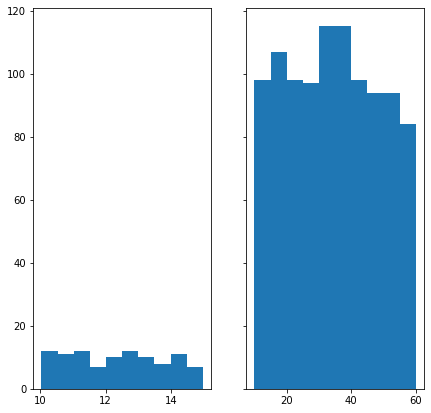

In [68]:
# your code here
def uni_rand_num(bottom, ceiling, count):
    x = np.random.uniform(size = count)
    a = bottom
    b = ceiling
    randoms = a + (b-a)*x
    return randoms

c = uni_rand_num(10,15,100)
d = uni_rand_num(10,60,1000)

fig, ax = plt.subplots(1,2, sharey = True, figsize=(7,7))
ax[0].hist(c, bins = 10)
ax[1].hist(d, bins = 10)
plt.show()

How are the two distributions different?

In [69]:
# your answer here:
'''
The distributions are different in the values range, and in the count, which makes every bar on the right histogram have
more results than the bars on the left histogram.
'''

'\nThe distributions are different in the values range, and in the count, which makes every bar on the right histogram have\nmore results than the bars on the left histogram.\n'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

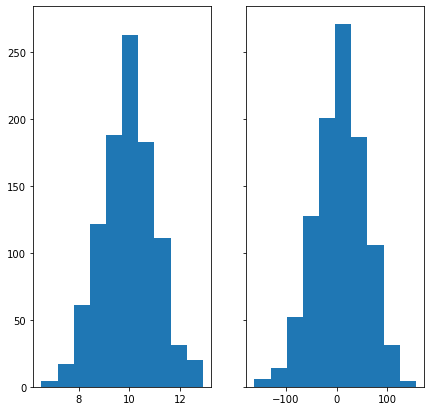

In [75]:
# your code here
def norm_rand_num(mu, sigma, count):
    x = np.random.normal(mu, sigma, count)
    return x

c = norm_rand_num(10,1,1000)
d = norm_rand_num(10,50,1000)

fig, ax = plt.subplots(1,2, sharey = True, figsize=(7,7))
ax[0].hist(c, bins = 10)
ax[1].hist(d, bins = 10)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
'''
The standard deviation in the graph to the right is much higher, which means that the range of values will be much bigger.
'''

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

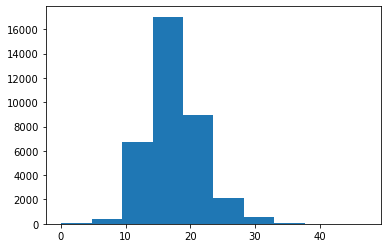

In [93]:
# your code here
import pandas as pd
vehicles = pd.read_csv("\\Users\\eduar\\lab-probability-distributions\\your-code\\vehicles.csv")
vehicles.head()

plt.hist(vehicles['Fuel Barrels/Year'])
plt.show()

2. CO2 Emission Grams/Mile 

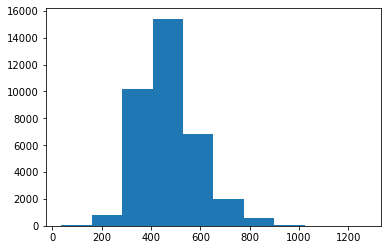

In [92]:
# your code here
plt.hist(vehicles['CO2 Emission Grams/Mile'])
plt.show()

3. Combined MPG

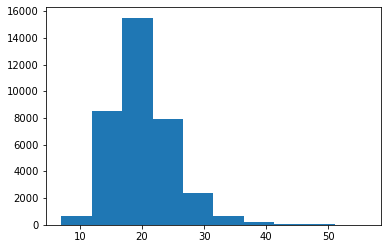

In [94]:
# your code here
plt.hist(vehicles['Combined MPG'])
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [101]:
# you answer here:
from scipy.stats import skew
print(skew(list(vehicles['Fuel Barrels/Year'])))
print(skew(list(vehicles['CO2 Emission Grams/Mile'])))
print(skew(list(vehicles['Combined MPG'])))

'''
Looking at the skewness of the variables we can see that the one that is closer to being nearly normally distributed is
the Fuel Barrels/Year variable.
'''

0.6382445784906978
0.7416608937445334
1.0677281511016457


'\nLooking at the skewness of the variables we can see that the one that is closer to being nearly normally distributed is\nthe Fuel Barrels/Year variable.\n'

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

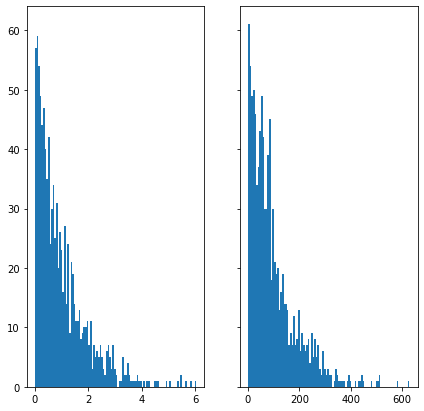

In [136]:
# your code here
def exp_rand_num(scale, count):
    x = np.random.exponential(scale, count)
    return x

c = exp_rand_num(1, 1000)
d = exp_rand_num(100,1000)

fig, ax = plt.subplots(1,2, sharey = True, figsize=(7,7))
ax[0].hist(c, bins = 100)
ax[1].hist(d, bins = 100)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
'''
The difference is that the mean of the distribution represented on the right is much higher than the on represented on the
left, that's why the range of values in x will be much higher.
'''

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [138]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon
lambdaa = 0.1
exp = expon(lambdaa)
prob = exp.cdf(15) - exp.pdf(15)
prob

0.9999993238513032

What is the probability that the customer will spend more than 15 minutes

In [139]:
# your answer here
lambdaa = 0.1
exp = expon(lambdaa)
prob2 = 1 - (exp.cdf(15) - exp.pdf(15))
prob2

6.761486968098751e-07